## 第八回課題

以下の項目についてまとめよ.

1. 1 次システム $P_{1st}(s) = 1/(1 + Ts)$ の $ωT = 1$ のときのゲインの値 [dB] および $ωT = 0.2, 5$ のと きの位相の値 [deg.] を計算せよ。割り切れない場合は小数点以下第 1 位まででよい．

2. 以下の信号 $u(t)$ を 1 次システム $P_1(s) = 1/(0.1s + 1)$ に入力したときの応答 $y_1(t)$ のグラフを描 き，$u(t)$ のグラフと比較してローパス特性を確認せよ。$t$ の範囲は 0 s から 4 s とする
$$
    u(t) = sin(5t) + sin(50t)
$$
3. 1 次システム $P_1(s) = 1/(0.1s + 1)$ のボード線図を書き，ゲイン線図と位相線図について，折れ線 近似と重ねたグラフを作成せよ．
(ヒント:plt.plot は与えた点を線分でつなぐので，折れ線近似の始点と折れる点と終点を与えて， plt.semilogx でのプロットと重ねればよい)

### 1. 1 次システム $P_{1st}(s) = 1/(1 + Ts)$ の $ωT = 1$ のときのゲインの値 [dB] および $ωT = 0.2, 5$ のと きの位相の値 [deg.] を計算せよ。割り切れない場合は小数点以下第 1 位まででよい．

#### $\omega_T = 1$
-3[dB]

#### $\omega_T = 0.2$
-11.3[dB]

#### $\omega_T = 5$
-26.6[dB]

### 2. 以下の信号 $u(t)$ を 1 次システム $P_1(s) = 1/(0.1s + 1)$ に入力したときの応答 $y_1(t)$ のグラフを描 き，$u(t)$ のグラフと比較してローパス特性を確認せよ。$t$ の範囲は 0 s から 4 s とする

In [13]:
# 各種ライブラリインポート
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

In [21]:
n = [1]
d = [0.1, 1]

#システムの伝達関数を定義
P = tf(n, d)
w = np.logspace(-3, 3, 100)
gain, phase, w = bode(P, w, Plot=False)
g_dB = 20 * np.log10(gain)
p_deg = phase * 180 / np.pi

#横軸の定義
t = np.linspace(0, 4, 1000)
u = np.sin(5*t) + np.sin(50*t)
y, t, x = lsim(P, u, t)

/Users/washio/opt/anaconda3/envs/pyctrl/lib/python3.8/site-packages/control/freqplot.py:181: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",
/Users/washio/opt/anaconda3/envs/pyctrl/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


In [22]:
#グラフスタイル設定
color = ["blue", "green", "red"]
linestyle = ["-", "--", "-."]

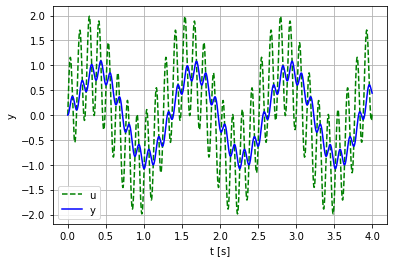

In [23]:
plt.plot(t, u, color=color[1], linestyle=linestyle[1],
             label="u")
plt.plot(t, y, color=color[0], linestyle=linestyle[0],
             label="y")

plt.xlabel("t [s]")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

### 3. 1 次システム $P_1(s) = 1/(0.1s + 1)$ のボード線図を書き，ゲイン線図と位相線図について，折れ線 近似と重ねたグラフを作成せよ．
(ヒント:plt.plot は与えた点を線分でつなぐので，折れ線近似の始点と折れる点と終点を与えて， plt.semilogx でのプロットと重ねればよい)

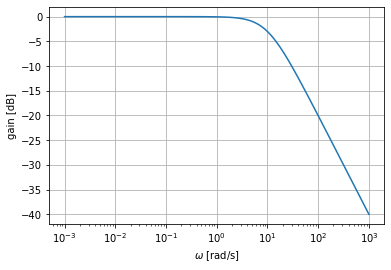

In [24]:
l = [0.001, 3, 1000]
gl = [0,0,-40]

plt.semilogx(w, g_dB)
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("gain [dB]")
plt.grid()
plt.show()

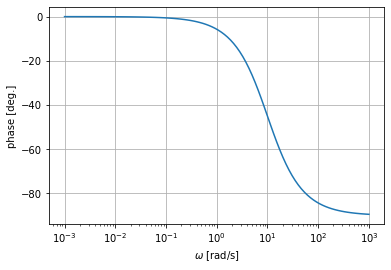

In [25]:
plt.semilogx(w, p_deg)
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("phase [deg.]")
plt.grid()
plt.show()